In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #svg
import pylab as plb # this notebook is for plotting
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator
plb.rcParams['image.interpolation'] = 'Nearest'
plb.rcParams['image.cmap'] = 'BrBG'
import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls

01_extract_metadata.ipynb
02_temporal_microstructure.ipynb
03_spectral_correlations.ipynb
extract_metadata.ipynb
open_loop_trial_db_22H05.hdf5
open_loop_trial_db_39E01.hdf5
trial_rasters_with_examples_sorted_by_behavior_39E01.pdf
trial_rasters_with_examples_sorted_by_behavior.pdf


In [3]:
import h5py
mtd_22H05 = h5py.File('open_loop_trial_db_22H05.hdf5','r')
mtd_39E01 = h5py.File('open_loop_trial_db_39E01.hdf5','r')

In [4]:
import plotfuncs as pf

example_trial = 2
trial = 'yaw_left'
col_keys = ['yaw_left','yaw_right','ascending']
row_keys = ['Ph2','Ph1','b1','b3','b2','i1','i2']

z_rng = 6
pltrng = (-3,12)

rows = len(row_keys)
cols = len(col_keys)+1

row_epochs = None
col_epochs  = (0,3)
row_labels_right = [None for j in range(rows)]

ybounds = [(0,200) for j in range(rows)] 
xbounds = [(-3,12) for j in range(cols)]  

col_labels_bottom = [None for i in range(cols)] 
col_labels_bottom[-1] = 'time (s)'
row_labels_left = [gd.signal_plot_info[sig]['ax_label'] for sig in row_keys]

col_labels_top = [gd.trial_to_label[trial] for trial in col_keys]
col_labels_top = ['trial#%s'%(example_trial)] + col_labels_top

show_spines_left = [False for j in range(rows)]
show_spines_left[0] = True
show_spines_right = [False for j in range(rows)]
show_spines_right[0] = True

show_spines_top = False
show_spines_bottom = [False for j in range(cols)]
show_spines_bottom[-1] = True

ytick_numbers = [3 for j in range(rows)]
xtick_numbers = [6 for i in range(cols)]
col_epochs_kwargs = {'alpha':0.5,'color':'b','clip_on':False,'lw':1,'fill':False}
figsize = (6.85039,10)
sub_samples = 20

In [6]:
trial_names = np.array(mtd_22H05['selected_signals']['trial_names'])
def get_selection_mtrx(signal,trial):
    selection = trial_names == trial
    return np.array(mtd_22H05['normed_signals'][signal][selection,:])
import copy

def plot_selection_mtrx(col,row):
    import plotfuncs as pf
    if col > 0:
        signal = row_keys[row]
        trial = col_keys[col-1]
        data_selection = get_selection_mtrx(signal,trial)#np.array(trial_db[signal])[selection,:]

        xi = gd.get_xio('yaw_left')
        down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
        plb.imshow(data_selection[down_samp_idx,:],aspect = 'auto',cmap = plb.cm.BrBG,extent = (xi[0],xi[-1],0,200),
              vmin = -z_rng,vmax = z_rng,interpolation = 'nearest')
        sig = np.mean(data_selection,axis = 0)
        pltidx = (xi>pltrng[0]) & (xi<pltrng[1])
        plb.plot(xi[pltidx],sig[pltidx]*(400/8.0) + 100,clip_on = False,color = 'k')
        
    if col == 0:
        signal = row_keys[row]
        trial = col_keys[col]
        data_selection = copy.copy(get_selection_mtrx(signal,trial))
        ### to re-introduce natural units.        
        selection = trial_names == trial
        mns = mtd_22H05['signal_means'][signal][selection]
        stds =  mtd_22H05['signal_norms'][signal][selection]
        data_selection *= stds[:,None]
        data_selection += mns[:,None]
        
        xi = gd.get_xio('yaw_left')
        down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
        sig = data_selection[down_samp_idx,:][example_trial]
        pltidx = (xi>pltrng[0]) & (xi<pltrng[1])
        plb.plot(xi[pltidx],sig[pltidx]*(100/8.0) + 100,clip_on = False,color = 'k')

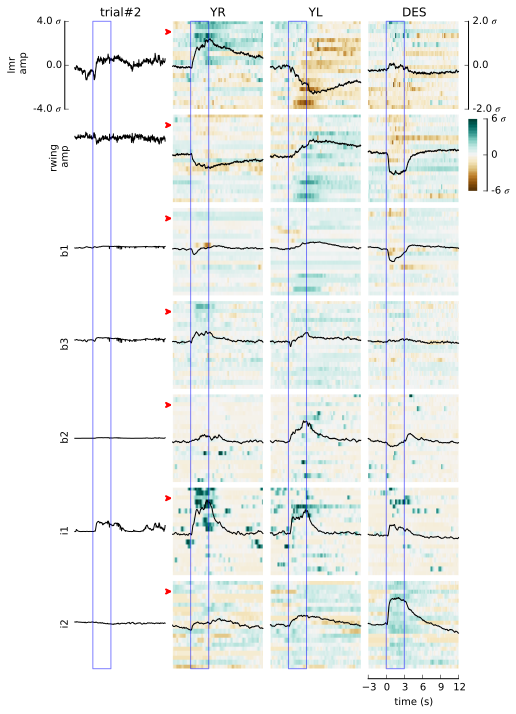

In [7]:
#############################
## Plot raster plots, all rasters sorted by behavioral responses
#############################
ax_grid,row_ep_pans,col_ep_pans = pf.plot_data_matrix(plot_panel_function = plot_selection_mtrx,
                               rows = rows,cols = cols,
                               row_epochs = row_epochs,
                               col_epochs = col_epochs,
                               ybounds = ybounds,
                               xbounds = xbounds,
                               figsize = figsize,
                               col_labels_top = col_labels_top,
                               col_labels_bottom = col_labels_bottom,
                               show_spines_left = show_spines_left,
                               show_spines_right = show_spines_right,
                               show_spines_bottom = show_spines_bottom,
                               show_spines_top = show_spines_top,
                               row_labels_left = row_labels_left,
                               row_labels_right = row_labels_right,
                               ytick_numbers = ytick_numbers,
                               xtick_numbers = xtick_numbers,
                               col_epochs_kwargs = col_epochs_kwargs)

[ax.set_zorder(11) for ax in col_ep_pans];

# add the color key
#rect = l,b,w,h
rect = 0.93,0.73,0.025,0.1
plb.gcf().add_axes(rect)
plb.gca().yaxis.set_label_position("right")
plb.imshow(np.array([np.linspace(8,-8)]).T,cmap = plb.cm.BrBG,extent = (0,1,-4,4))
plb.yticks(np.linspace(-4,4,3))
plb.gca().set_yticklabels([u'-%s $\u03C3$'%(z_rng),'0',u'%s $\u03C3$'%(z_rng)])
pf.kill_spines()
plb.gca().spines['right'].set_visible(True)
plb.gca().spines['right'].set_position(('outward',10))

plb.tick_params(axis='y', which='both', labelleft='off', labelright='on')
[y.set_visible(False) for y in plb.gca().get_yticklines()[::2]]

lbax = ax_grid[0][-1][1]
new_labels = [str(x) for x in np.linspace(-2,2,3)]
new_labels[0] = u'%s $\u03C3$'%(new_labels[0])
new_labels[-1] = u'%s $\u03C3$'%(new_labels[-1])
lbax.set_yticklabels(new_labels,y=2)

lbax = ax_grid[0][0]
new_labels = [str(x) for x in np.linspace(-4,4,3)]
new_labels[0] = u'%s $\u03C3$'%(new_labels[0])
new_labels[-1] = u'%s $\u03C3$'%(new_labels[-1])
lbax.set_yticklabels(new_labels)

arrow_vpos = 200-(200/sub_samples)*example_trial - 4

import matplotlib
for row in ax_grid:
    plb.sca(row[1])
    arr = matplotlib.patches.FancyArrowPatch(posA=(-4,arrow_vpos), posB=(-3,arrow_vpos), 
                              arrowstyle='->',  
                              patchA=None, patchB=None, shrinkA=0.3, shrinkB=0.3,
                              mutation_scale=10.0, mutation_aspect=None, dpi_cor=1.0,clip_on = False,color = 'r',
                              lw=2)
    plb.gca().add_patch(arr)

plb.draw()
plb.savefig('trial_rasters_with_examples_sorted_by_behavior.pdf')

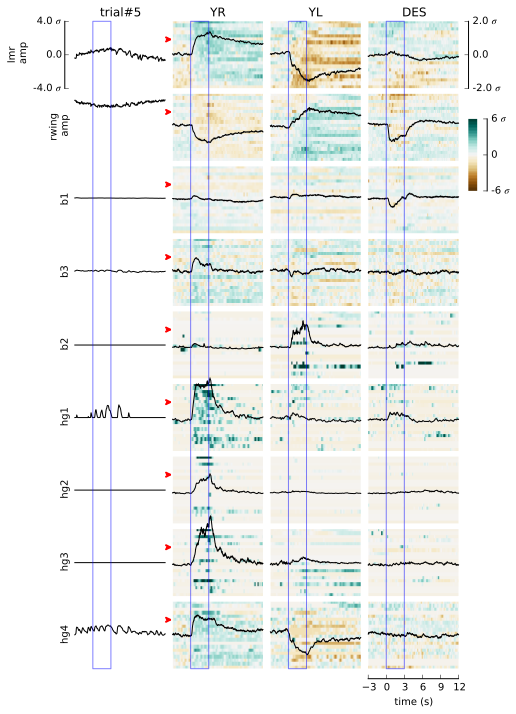

In [10]:
import plotfuncs as pf

example_trial = 5
trial = 'yaw_left'
col_keys = ['yaw_left','yaw_right','ascending']
row_keys = ['Ph2','Ph1','b1','b3','b2','hg1','hg2','hg3','hg4']

z_rng = 6
pltrng = (-3,12)

rows = len(row_keys)
cols = len(col_keys)+1

row_epochs = None
col_epochs  = (0,3)
row_labels_right = [None for j in range(rows)]

ybounds = [(0,200) for j in range(rows)] 
xbounds = [(-3,12) for j in range(cols)]  

col_labels_bottom = [None for i in range(cols)] 
col_labels_bottom[-1] = 'time (s)'
row_labels_left = [gd.signal_plot_info[sig]['ax_label'] for sig in row_keys]

col_labels_top = [gd.trial_to_label[trial] for trial in col_keys]
col_labels_top = ['trial#%s'%(example_trial)] + col_labels_top

show_spines_left = [False for j in range(rows)]
show_spines_left[0] = True
show_spines_right = [False for j in range(rows)]
show_spines_right[0] = True

show_spines_top = False
show_spines_bottom = [False for j in range(cols)]
show_spines_bottom[-1] = True

ytick_numbers = [3 for j in range(rows)]
xtick_numbers = [6 for i in range(cols)]
col_epochs_kwargs = {'alpha':0.5,'color':'b','clip_on':False,'lw':1,'fill':False}
figsize = (6.85039,10)
sub_samples = 20

trial_names = np.array(mtd_39E01['selected_signals']['trial_names'])
def get_selection_mtrx(signal,trial):
    selection = trial_names == trial
    return np.array(mtd_39E01['normed_signals'][signal][selection,:])

def plot_selection_mtrx(col,row):
    import plotfuncs as pf
    if col > 0:
        signal = row_keys[row]
        trial = col_keys[col-1]
        data_selection = get_selection_mtrx(signal,trial)#np.array(trial_db[signal])[selection,:]
        xi = gd.get_xio('yaw_left')
        down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
        plb.imshow(data_selection[down_samp_idx,:],aspect = 'auto',cmap = plb.cm.BrBG,extent = (xi[0],xi[-1],0,200),
              vmin = -z_rng,vmax = z_rng,interpolation = 'nearest')
        sig = np.mean(data_selection,axis = 0)
        pltidx = (xi>pltrng[0]) & (xi<pltrng[1])
        plb.plot(xi[pltidx],sig[pltidx]*(400/8.0) + 100,clip_on = False,color = 'k')
        
    if col == 0:
        signal = row_keys[row]
        trial = col_keys[col]
        data_selection = get_selection_mtrx(signal,trial)
        xi = gd.get_xio('yaw_left')
        ### to re-introduce natural units.        
        selection = trial_names == trial
        mns = mtd_39E01['signal_means'][signal][selection]
        stds =  mtd_39E01['signal_norms'][signal][selection]
        data_selection *= stds[:,None]
        data_selection += mns[:,None]
        
        down_samp_idx = np.linspace(2,data_selection.shape[0]-2,sub_samples).astype(int)
        sig = data_selection[down_samp_idx,:][example_trial]
        pltidx = (xi>pltrng[0]) & (xi<pltrng[1])
        plb.plot(xi[pltidx],sig[pltidx]*(100/8.0) + 100,clip_on = False,color = 'k')

#############################
## Plot raster plots, all rasters sorted by behavioral responses
#############################
ax_grid,row_ep_pans,col_ep_pans = pf.plot_data_matrix(plot_panel_function = plot_selection_mtrx,
                               rows = rows,cols = cols,
                               row_epochs = row_epochs,
                               col_epochs = col_epochs,
                               ybounds = ybounds,
                               xbounds = xbounds,
                               figsize = figsize,
                               col_labels_top = col_labels_top,
                               col_labels_bottom = col_labels_bottom,
                               show_spines_left = show_spines_left,
                               show_spines_right = show_spines_right,
                               show_spines_bottom = show_spines_bottom,
                               show_spines_top = show_spines_top,
                               row_labels_left = row_labels_left,
                               row_labels_right = row_labels_right,
                               ytick_numbers = ytick_numbers,
                               xtick_numbers = xtick_numbers,
                               col_epochs_kwargs = col_epochs_kwargs)

[ax.set_zorder(11) for ax in col_ep_pans];

# add the color key
#rect = l,b,w,h
rect = 0.93,0.73,0.025,0.1
plb.gcf().add_axes(rect)
plb.gca().yaxis.set_label_position("right")
plb.imshow(np.array([np.linspace(8,-8)]).T,cmap = plb.cm.BrBG,extent = (0,1,-4,4))
plb.yticks(np.linspace(-4,4,3))
plb.gca().set_yticklabels([u'-%s $\u03C3$'%(z_rng),'0',u'%s $\u03C3$'%(z_rng)])
pf.kill_spines()
plb.gca().spines['right'].set_visible(True)
plb.gca().spines['right'].set_position(('outward',10))

plb.tick_params(axis='y', which='both', labelleft='off', labelright='on')
[y.set_visible(False) for y in plb.gca().get_yticklines()[::2]]

lbax = ax_grid[0][-1][1]
new_labels = [str(x) for x in np.linspace(-2,2,3)]
new_labels[0] = u'%s $\u03C3$'%(new_labels[0])
new_labels[-1] = u'%s $\u03C3$'%(new_labels[-1])
lbax.set_yticklabels(new_labels,y=2)

lbax = ax_grid[0][0]
new_labels = [str(x) for x in np.linspace(-4,4,3)]
new_labels[0] = u'%s $\u03C3$'%(new_labels[0])
new_labels[-1] = u'%s $\u03C3$'%(new_labels[-1])
lbax.set_yticklabels(new_labels)

arrow_vpos = 200-(200/sub_samples)*example_trial - 4

import matplotlib
for row in ax_grid:
    plb.sca(row[1])
    arr = matplotlib.patches.FancyArrowPatch(posA=(-4,arrow_vpos), posB=(-3,arrow_vpos), 
                              arrowstyle='->',  
                              patchA=None, patchB=None, shrinkA=0.3, shrinkB=0.3,
                              mutation_scale=10.0, mutation_aspect=None, dpi_cor=1.0,clip_on = False,color = 'r',
                              lw=2)
    plb.gca().add_patch(arr)

plb.draw()
plb.savefig('trial_rasters_with_examples_sorted_by_behavior_39E01.pdf')